# Код работы
## Введение


Данные для обработки проекта были взяты из . Данные являются вторичными, так как они были собраны не нашей группой. В этих данных содержится информация о площади района и его жилфонда, численности населения, а также координаты.
Ниже приведен импорт двух библиотек: **pandas** для работы с данными и **matlolib.pyplot** для визуализации создания и визуализации графиков и карт. Также ниже представлена загрузка данных из CSV-файла, которое нужно для чтения файла.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

fd=pd.read_csv('C:\\Users\\Downloads\\Moscow_Population_2018.csv')

### Обработка
Чтобы работать с данными, мы извлекаем из файла столбец с площадью в **sq**, а столбец населения в **pop**. Все запятые были изменены на точки (_sq1_), чтобы преобразовать эти данные в числа (_sq2 и pop1_). Далее мы вводим переменную **density**, которая обозначает плотность населения (деление населения на площадь), размерность: чел./км<sup>2</sup>.

In [11]:
sq=fd['Площадь']
sq1=sq.replace(',','.',regex=True)
sq2=pd.to_numeric(sq1, errors='coerce')

pop=fd['Население']
pop1=pd.to_numeric(pop, errors='coerce')

density=pop1/sq2

### Построение графиков
#### Наиболее и наименнее плотнозаселенные  районы Москвы
С помощью модуля **.nlargest** мы узнаем 30 наиболее заселенных районов Москвы по плотности населения и определяем их индекс, с помощью чего впоследствии мы сможем определить каким именно районам соответсвует наибольшая плотность населения.
Далее с помощью библиотеки matlolib.pyplot мы строим столбчатую диаграмму, где будут расположены эти 30 районов. С помощью этого мы настраиваем оси (*plt.xlabel(), plt.ylabel()*), заголовок (*plt.title()*) и параметры отображения графика (*plt.xticks(), plt.bar()*). Ниже как раз будет приведен этот график.


Text(0.5, 1.0, '30 самых плотно заселенных районов Москвы в 2018 году')

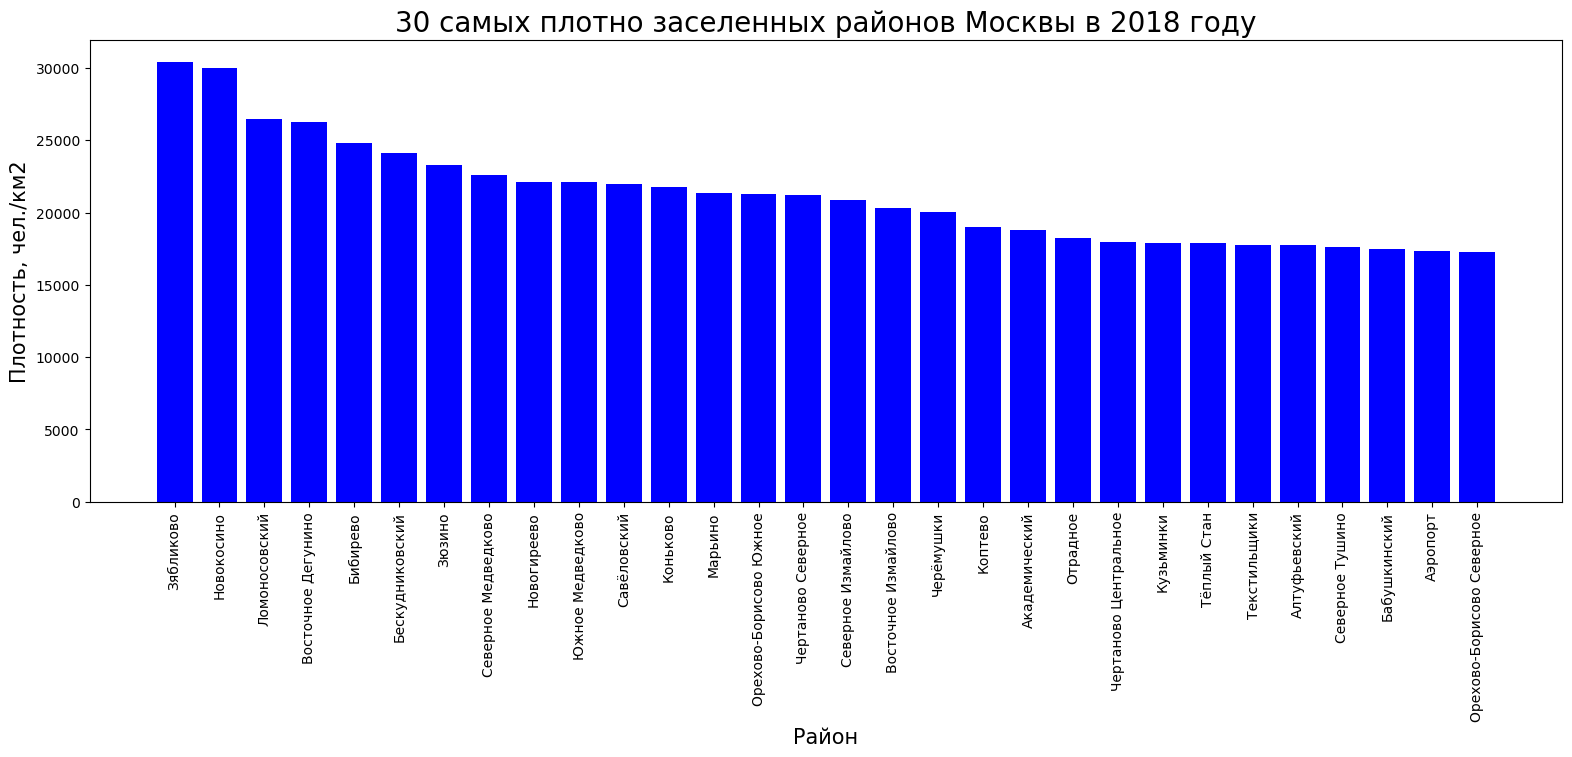

In [12]:
top_30_density=density.nlargest(30)
mask=top_30_density.index
top_30_density_neib=fd['Район'].loc[mask]

plt.figure(figsize=(19,6))
plt.bar(top_30_density_neib, top_30_density, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Район', fontsize=15)
plt.ylabel('Плотность, чел./км2', fontsize=15)
plt.title('30 самых плотно заселенных районов Москвы в 2018 году', fontsize=20)

Здесь показаны аналогичные действия, только с использованием  модуля **.nsmallest** для извлечения данных о 30 наименее заселенных районов по плотности, а также построения столбчатой диаграммы по этим данным.

Text(0.5, 1.0, '30 наименее плотно заселенных районов Москвы в 2018 году')

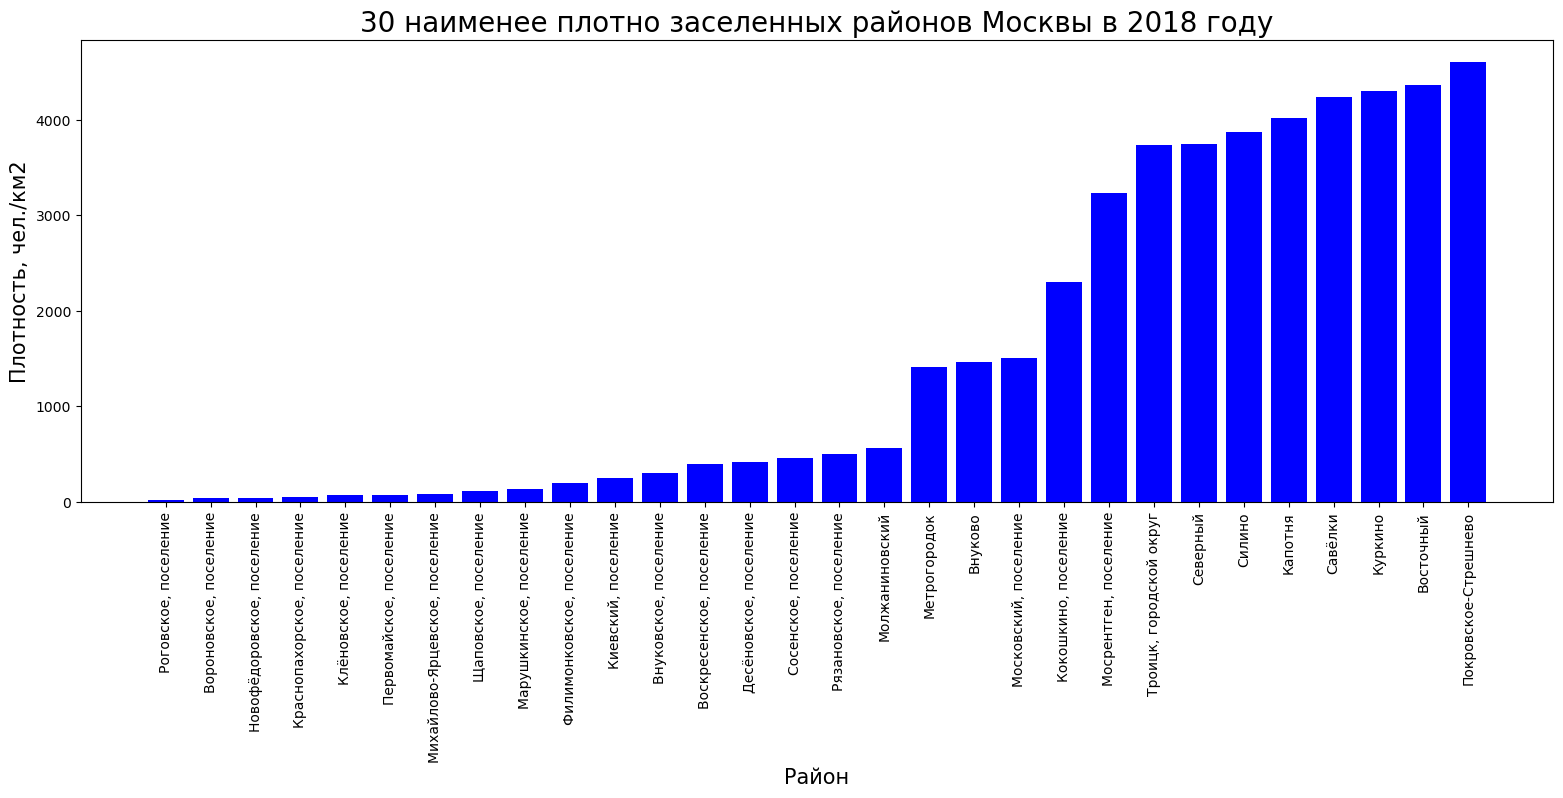

In [14]:
antitop_30_density=density.nsmallest(30)
mask2=antitop_30_density.index
antitop_30_density_neib=fd['Район'].loc[mask2]

plt.figure(figsize=(19,6))
plt.bar(antitop_30_density_neib,antitop_30_density, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Район', fontsize=15)
plt.ylabel('Плотность, чел./км2', fontsize=15)
plt.title('30 наименее плотно заселенных районов Москвы в 2018 году', fontsize=20)

#### Районы с максимальными и минимальными значениями жилого фонда на душу населения
Аналогично предыдущей обратботке данных, мы извлекаем из файла столбец Площади жилого фонда и преобразовываем его в числа с помощью замены запятых. Далее вводим новую переменную **obesp_zhil**, которая обозначает обеспеченность жилым фондом на душу населения, размерносить м<sup>2</sup>/чел.
Также по этим данным будут построены две столбчатые диаграммы: 30 наиболее и наименее обеспеченных жилым фондом районов Москвы в 2018 году, используя уже известные модули.

Text(0.5, 1.0, '30 наименее обеспеченных жилым фондом районов Москвы в 2018 году')

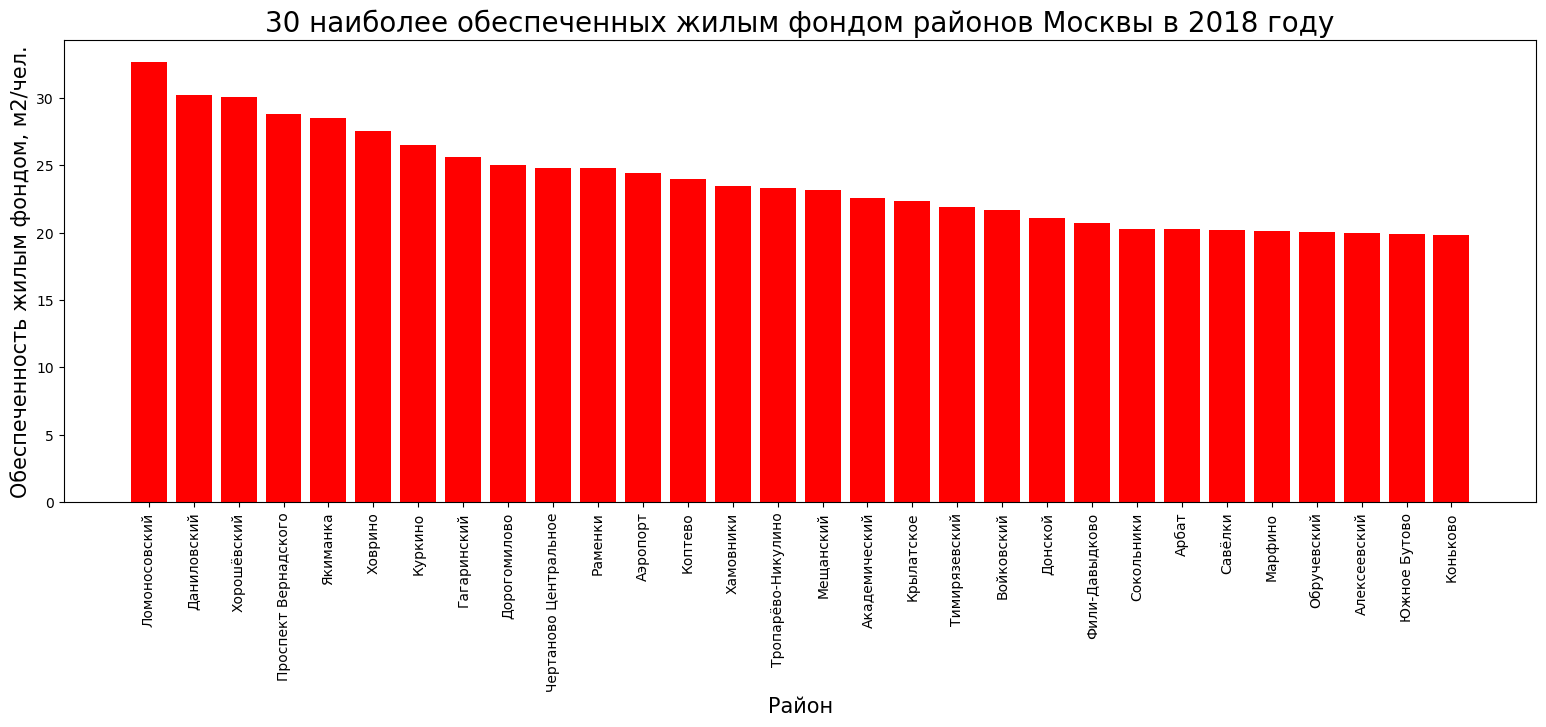

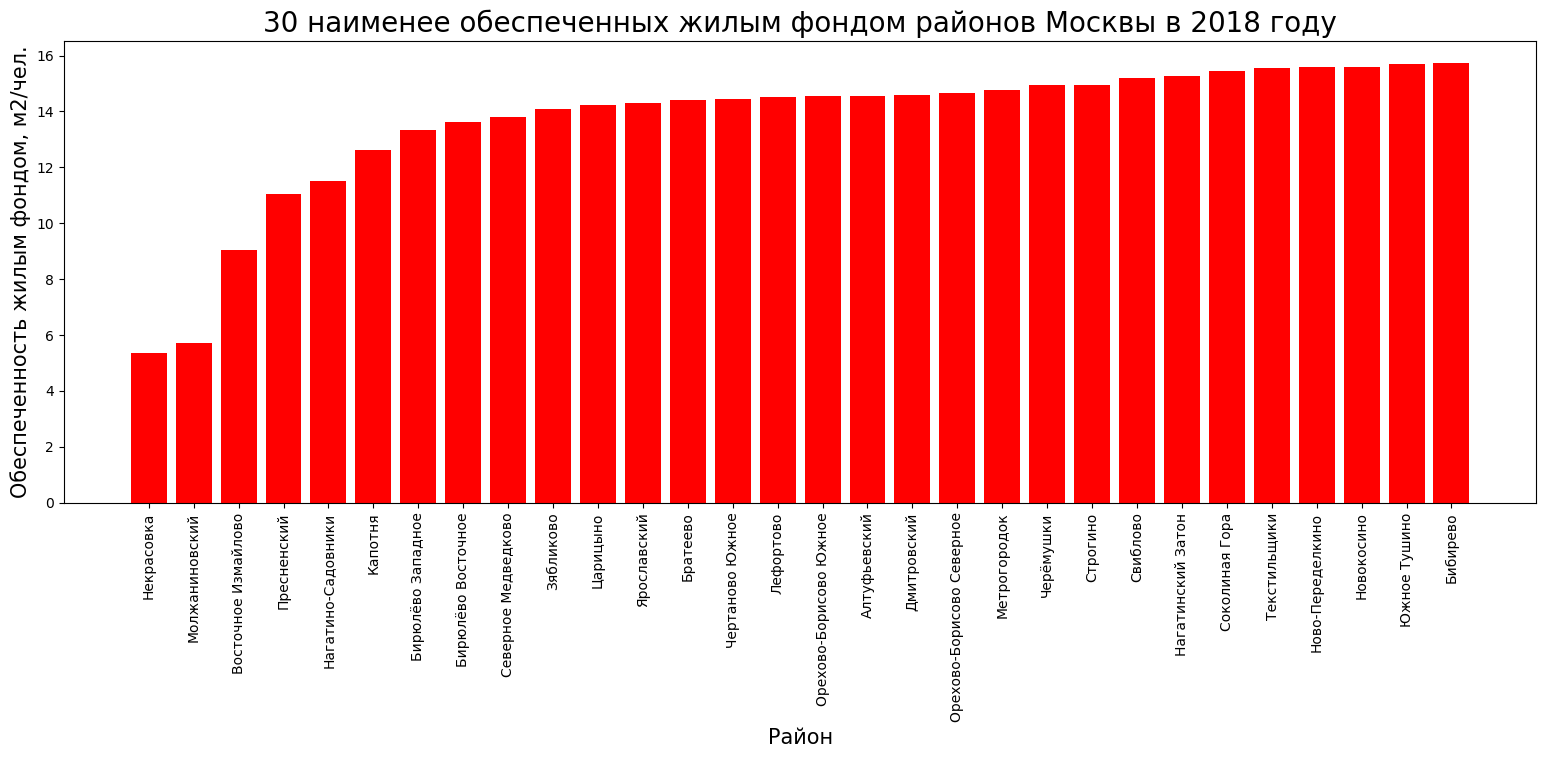

In [17]:
zhil=fd['Площадь жилфонда']
zhil1=zhil.replace(',','.',regex=True)
zhil2=pd.to_numeric(zhil1, errors='coerce')

obesp_zhil=(zhil2/pop1)*1000

top_30_obesp_zhil=obesp_zhil.nlargest(30)
mask3=top_30_obesp_zhil.index
top_30_obesp_zhil_neib=fd['Район'].loc[mask3]

plt.figure(figsize=(19,6))
plt.bar(top_30_obesp_zhil_neib,top_30_obesp_zhil, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Район', fontsize=15)
plt.ylabel('Обеспеченность жилым фондом, м2/чел.', fontsize=15)
plt.title('30 наиболее обеспеченных жилым фондом районов Москвы в 2018 году', fontsize=20)

antitop_30_obesp_zhil=obesp_zhil.nsmallest(30)
mask4=antitop_30_obesp_zhil.index
antitop_30_obesp_zhil_neib=fd['Район'].loc[mask4]

plt.figure(figsize=(19,6))
plt.bar(antitop_30_obesp_zhil_neib,antitop_30_obesp_zhil, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Район', fontsize=15)
plt.ylabel('Обеспеченность жилым фондом, м2/чел.', fontsize=15)
plt.title('30 наименее обеспеченных жилым фондом районов Москвы в 2018 году', fontsize=20)

#### Районы с максимальной и минимальной плотностью жилой застройки
Имея данные по жилфонду и площади районов, мы находим новую переменную **density_zhil**, которая будет обозначать плотность жилой застройки по районам Москвы. Также будут построены две столбчатые диаграммы по этим данным, аналогично предыдущим шагам.

Text(0, 0.5, 'Плотность жилой застройки')

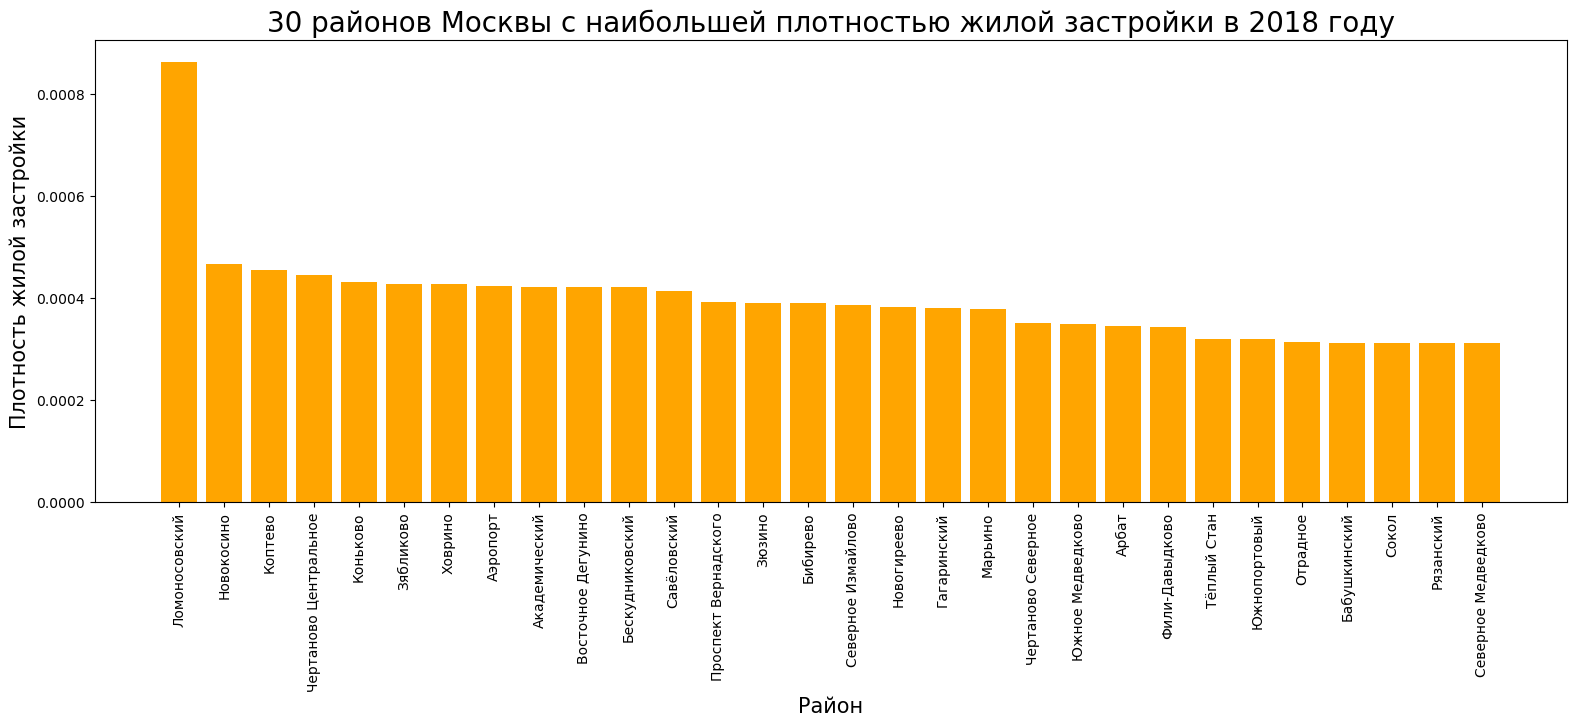

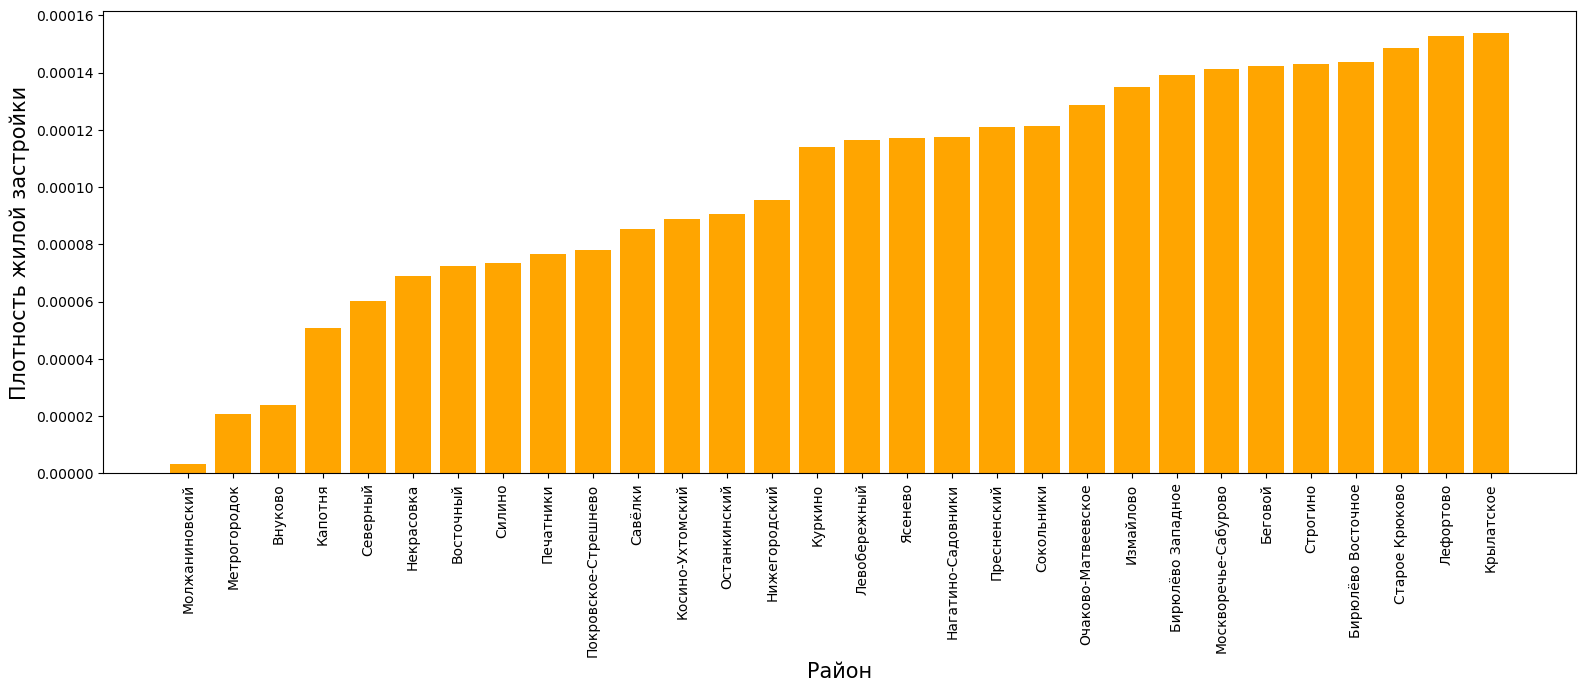

In [18]:
sq2=pd.to_numeric(sq1, errors='coerce')
zhil2=pd.to_numeric(zhil1, errors='coerce')
density_zhil=zhil2/(sq2*1000000)

top_30_density_zhil=density_zhil.nlargest(30)
mask5=top_30_density_zhil.index
top_30_density_zhil_neib=fd['Район'].loc[mask5]

plt.figure(figsize=(19,6))
plt.bar(top_30_density_zhil_neib,top_30_density_zhil, color='orange')
plt.xticks(rotation='vertical')
plt.xlabel('Район', fontsize=15)
plt.ylabel('Плотность жилой застройки', fontsize=15)
plt.title('30 районов Москвы с наибольшей плотностью жилой застройки в 2018 году', fontsize=20)

antitop_30_density_zhil=density_zhil.nsmallest(30)
mask6=antitop_30_density_zhil.index
antitop_30_density_zhil_neib=fd['Район'].loc[mask6]

plt.figure(figsize=(19,6))
plt.bar(antitop_30_density_zhil_neib,antitop_30_density_zhil, color='orange')
plt.xticks(rotation='vertical')
plt.xlabel('Район', fontsize=15)
plt.ylabel('Плотность жилой застройки', fontsize=15)

### Работа с координатами
#### Извлечение координат
Ниже будет приведен код, который помогает извлечь из исходного CSV-файла. В этой части создается два списка: **lan** и **lot**, в которые извлекаются координаты из столбца "Координаты района" и обрабатываются с помощью цикла: разделение строк по частям и преобразование в числовой формат.

In [19]:
lan=[]
lot=[]
y=0
koor = fd['Коодинаты района'].tolist()
for i in koor:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lot.append(xd)
                            else:
                                lan.append(xd)

#### Обработка координат по показателю плотности населения
Ниже представлен код, который позволяет обработать и визуализировать данные в карту по различным показателям, в данном случае по плотности населения. На итговой "карте" розовым цветом будут выделены районы, которые преобладают в плотности населения, а фиолетовым - районы с наименьшей плотностью населения. По большей части, код напоминает извлечение координат из файла, а построение "карты" практически не отличается по написанию от графиков, которые были построены выше.


Text(0.5, 1.0, 'Районы Москвы с наибольшей плотностью населения в 2018 году')

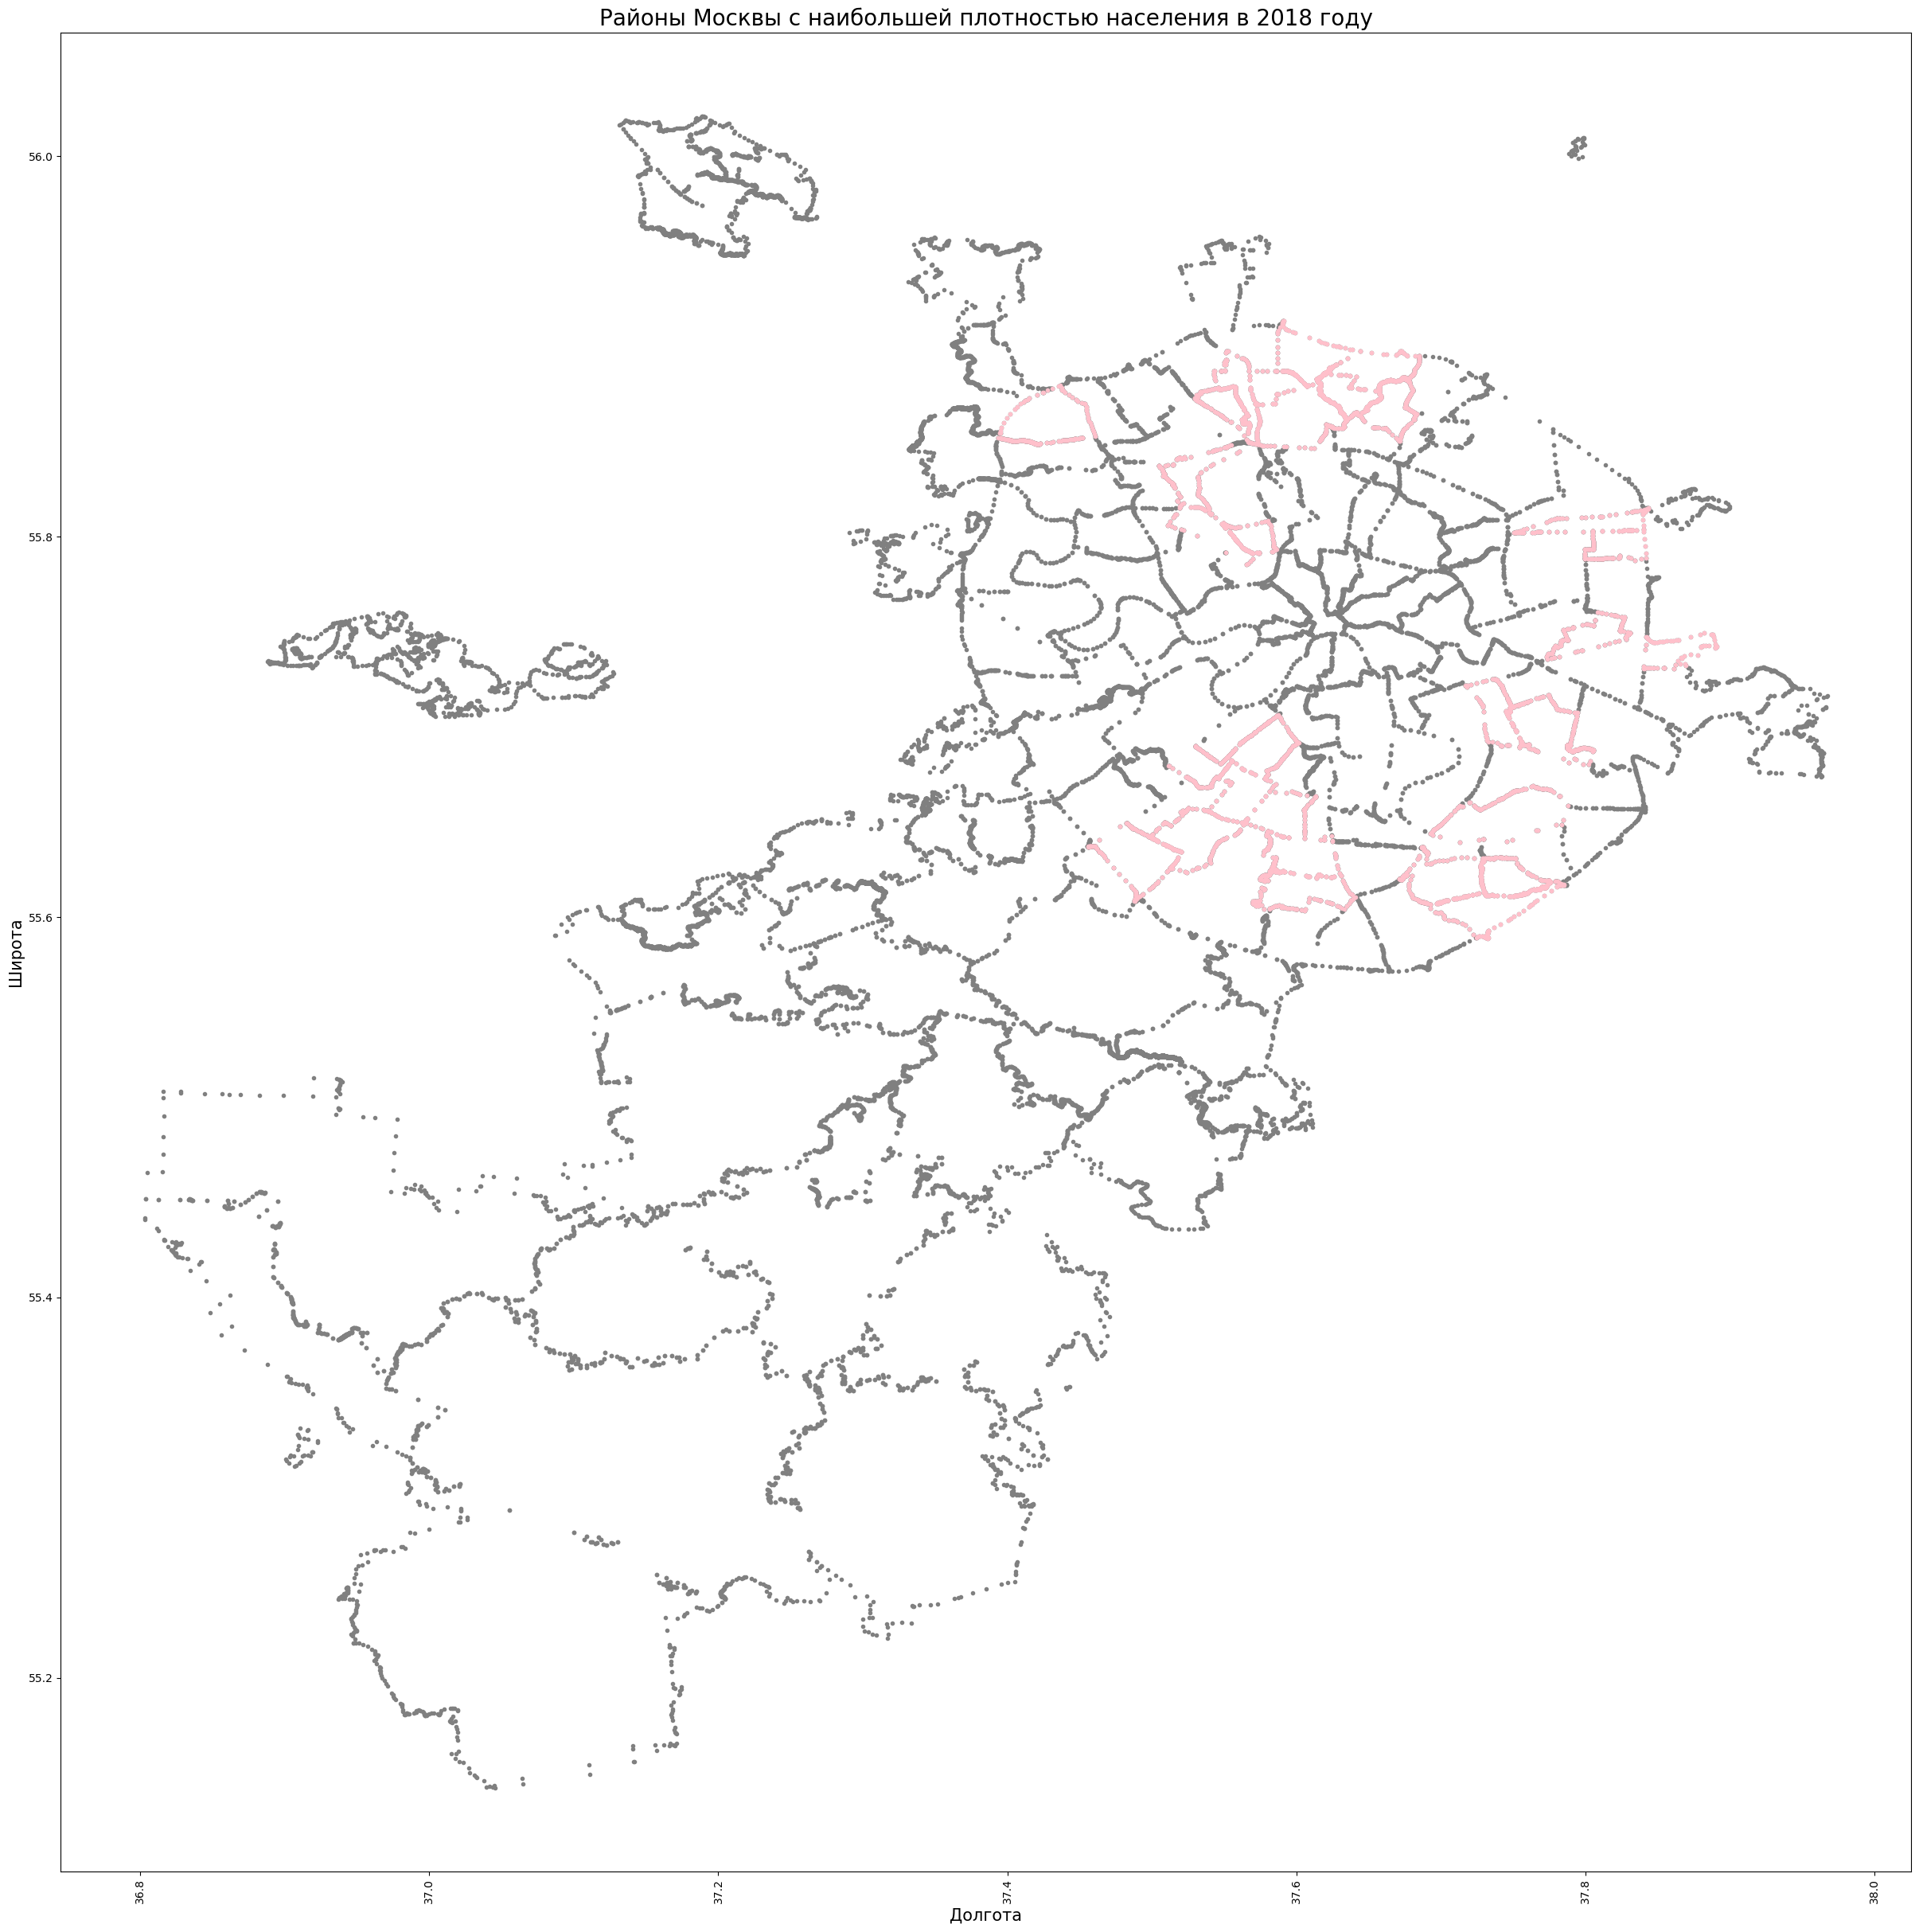

In [22]:
lat_density=[]
lon_density=[]
koor_density=fd['Коодинаты района'].loc[mask]
for i in koor_density:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lon_density.append(xd)
                            else:
                                lat_density.append(xd)                                
plt.figure(figsize=(30,30))
plt.plot(lot,lan,'.', color='grey')
plt.plot(lon_density,lat_density,'.',color='pink')
plt.xticks(rotation='vertical')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.title('Районы Москвы с наибольшей плотностью населения в 2018 году', fontsize=20)

Text(0.5, 1.0, 'Районы Москвы с наименьшей плотностью населения в 2018 году')

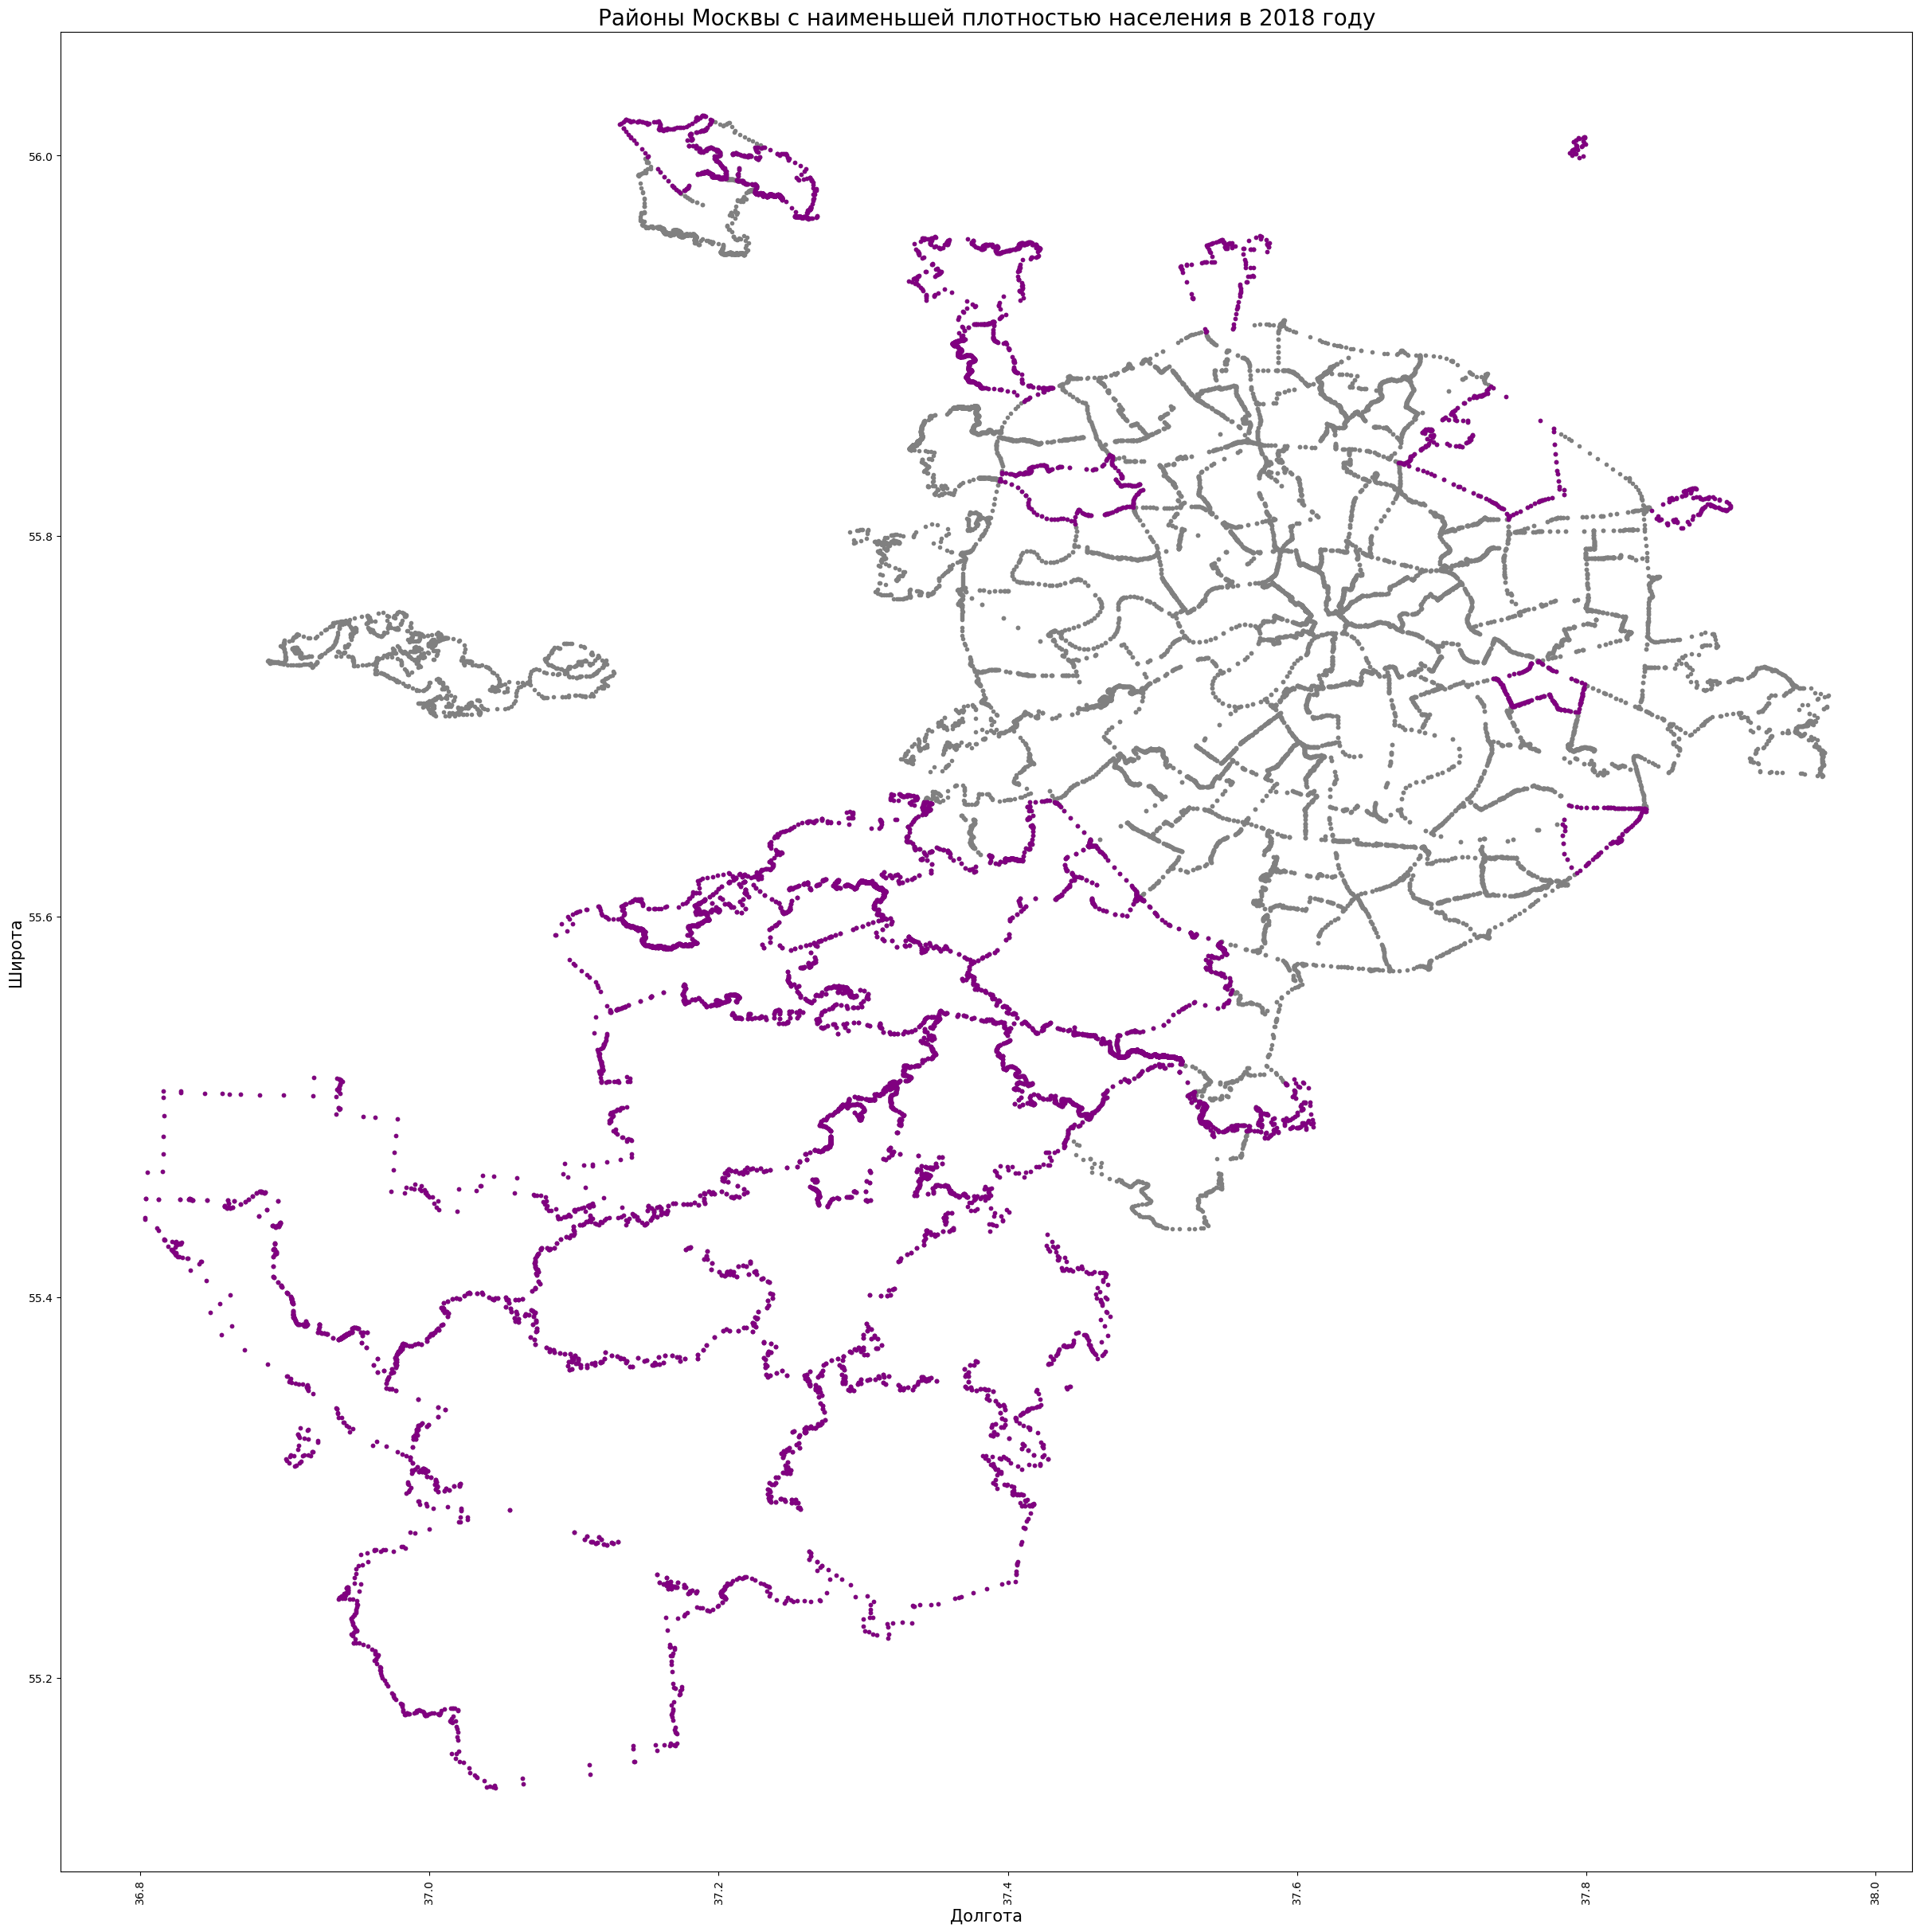

In [23]:
lat_antidensity=[]
lon_antidensity=[]
koor_antidensity=fd['Коодинаты района'].loc[mask2]
for i in koor_antidensity:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lon_antidensity.append(xd)
                            else:
                                lat_antidensity.append(xd)   
plt.figure(figsize=(30,30))
plt.plot(lot,lan,'.', color='grey')
plt.plot(lon_antidensity,lat_antidensity,'.',color='purple')
plt.xticks(rotation='vertical')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.title('Районы Москвы с наименьшей плотностью населения в 2018 году', fontsize=20) 

#### Обработка координат по показателю обеспеченности жилья
Ниже представлен код, который позволяет обработать и визуализировать данные в карту по обеспеченности жильем. На итоговой "карте" зеленым цветом будут выделены районы, которые преобладают по этому показателю, а желтым - районы с наименьшей обеспеченностью.

Text(0.5, 1.0, 'Районы Москвы с наибольшей обеспеченностью жилья в 2018 году')

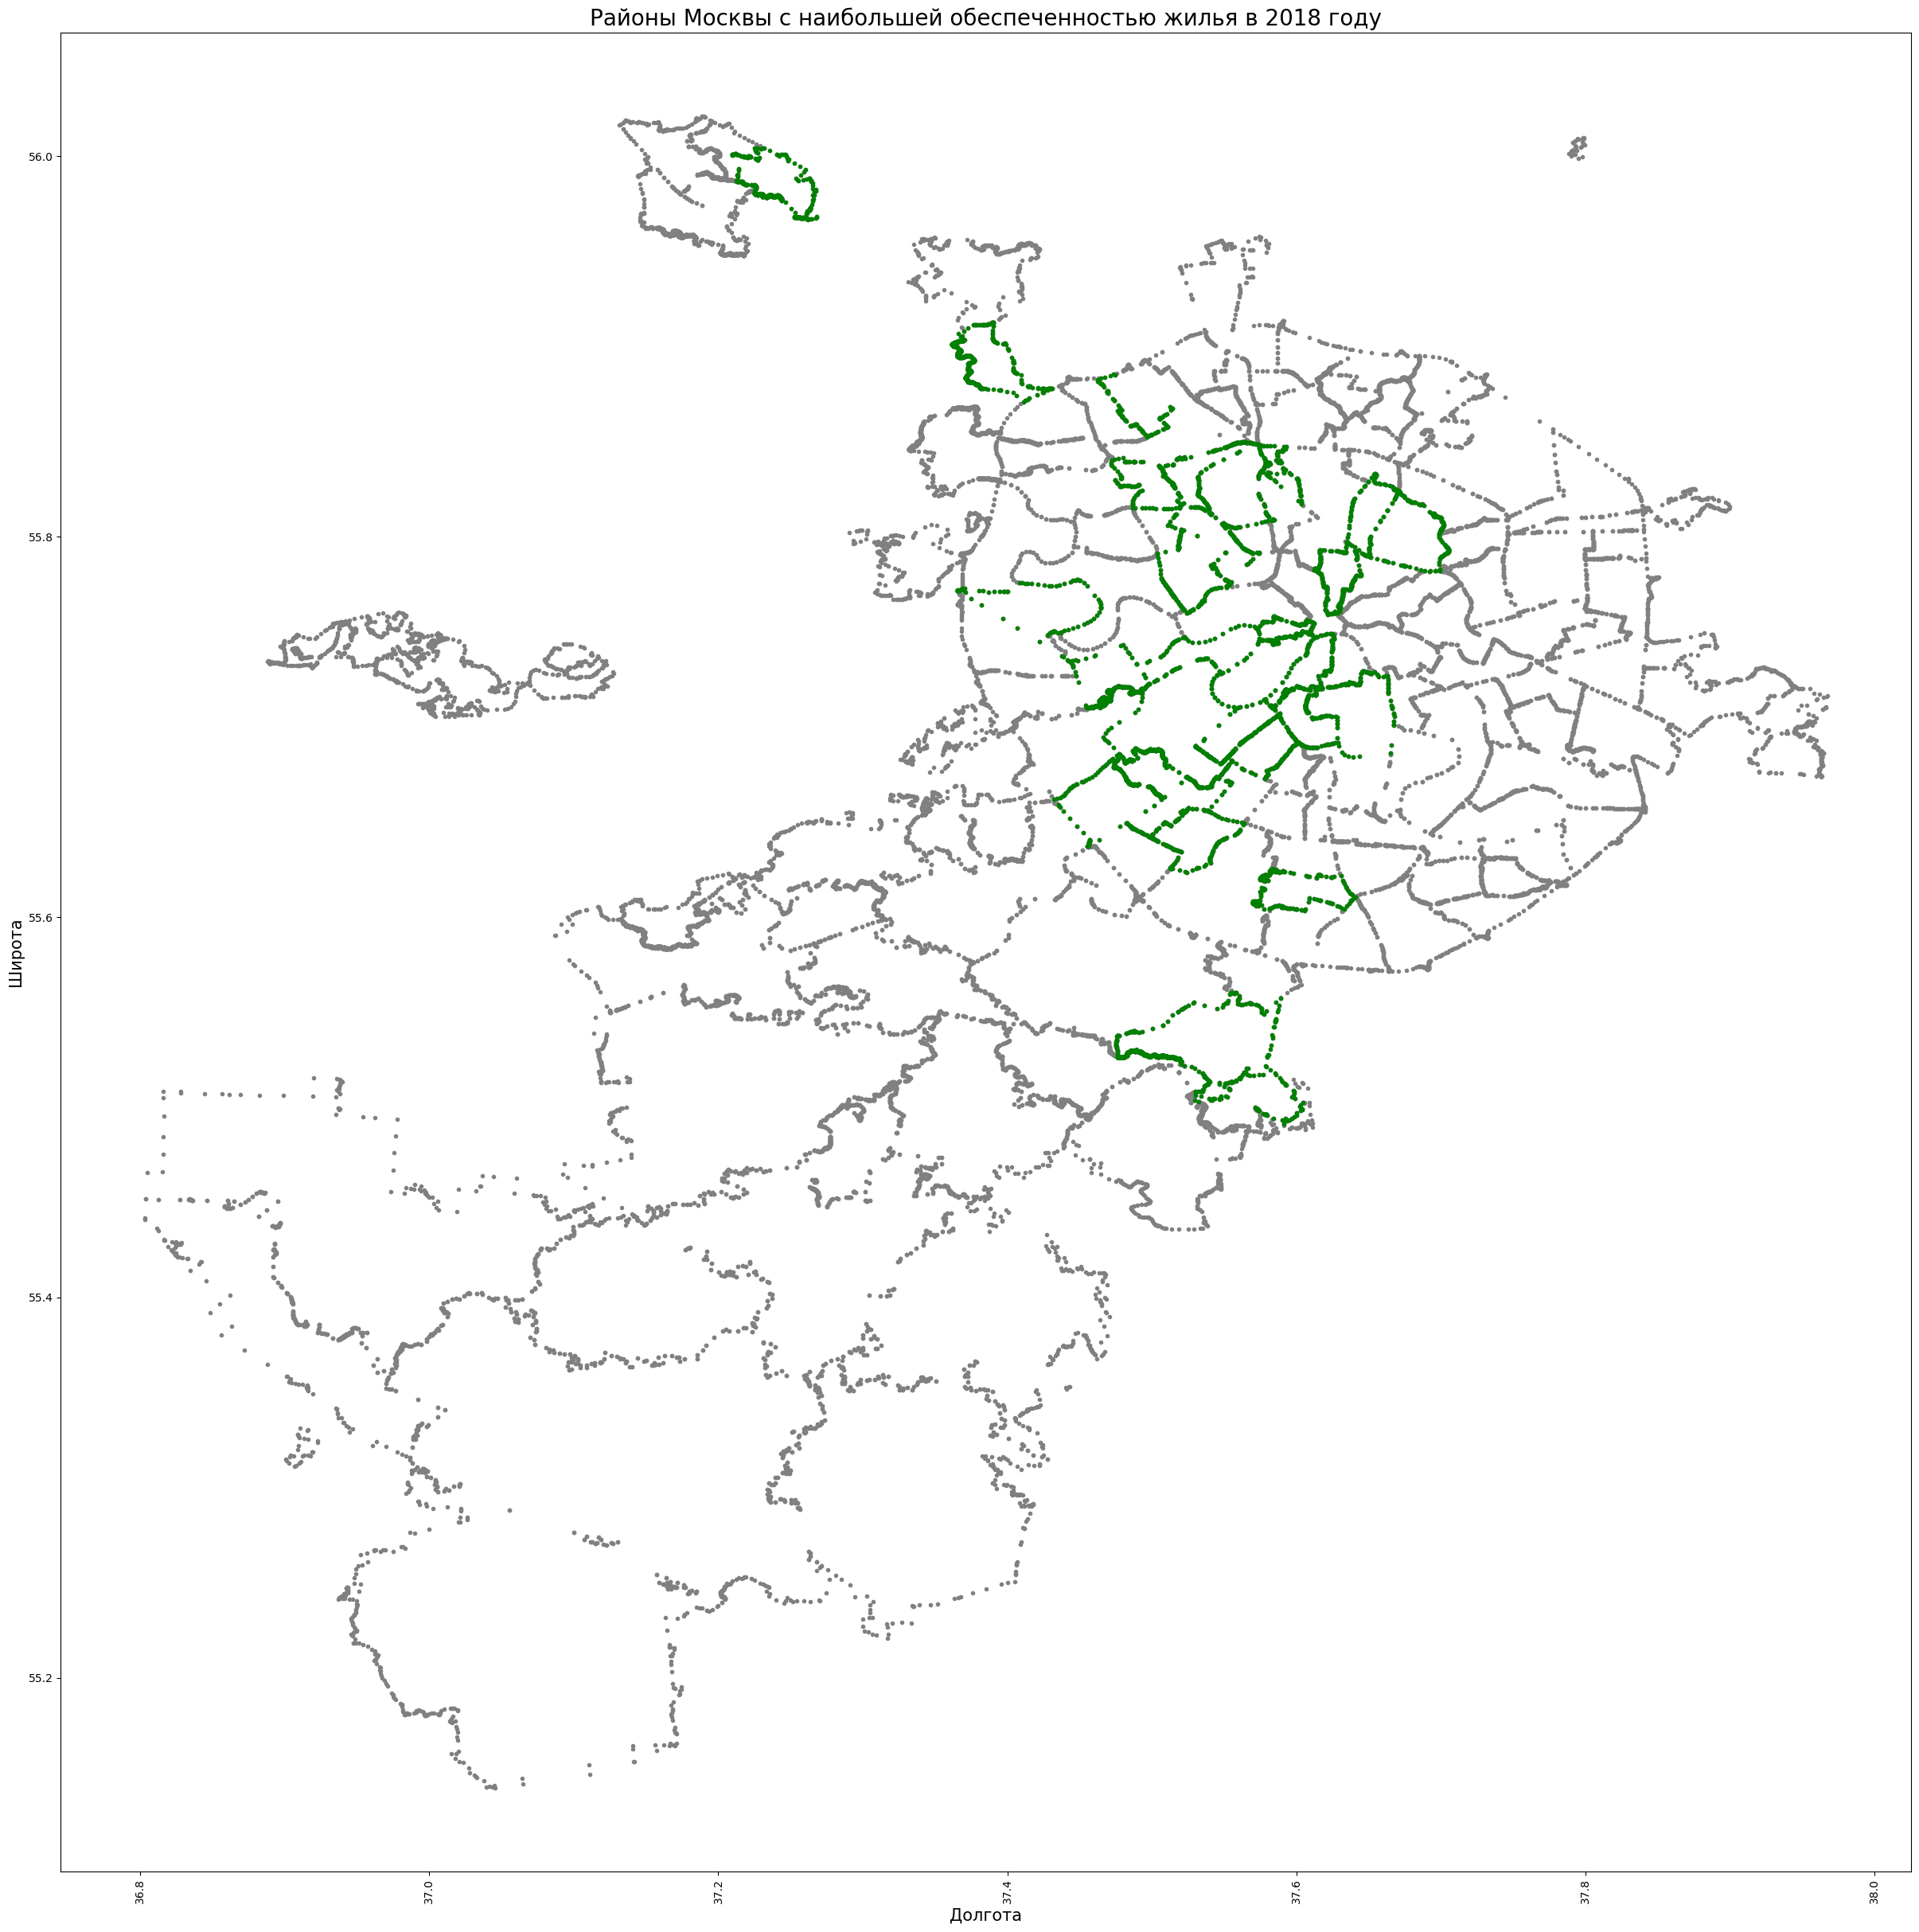

In [24]:
lat_obes=[]
lon_obes=[]
koor_obes=fd['Коодинаты района'].loc[mask3]
for i in koor_obes:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lon_obes.append(xd)
                            else:
                                lat_obes.append(xd)   
plt.figure(figsize=(30,30))
plt.plot(lot,lan,'.', color='grey')
plt.plot(lon_obes,lat_obes,'.',color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.title('Районы Москвы с наибольшей обеспеченностью жилья в 2018 году', fontsize=20)

Text(0.5, 1.0, 'Районы Москвы с наименьшей обеспеченностью жилья в 2018 году')

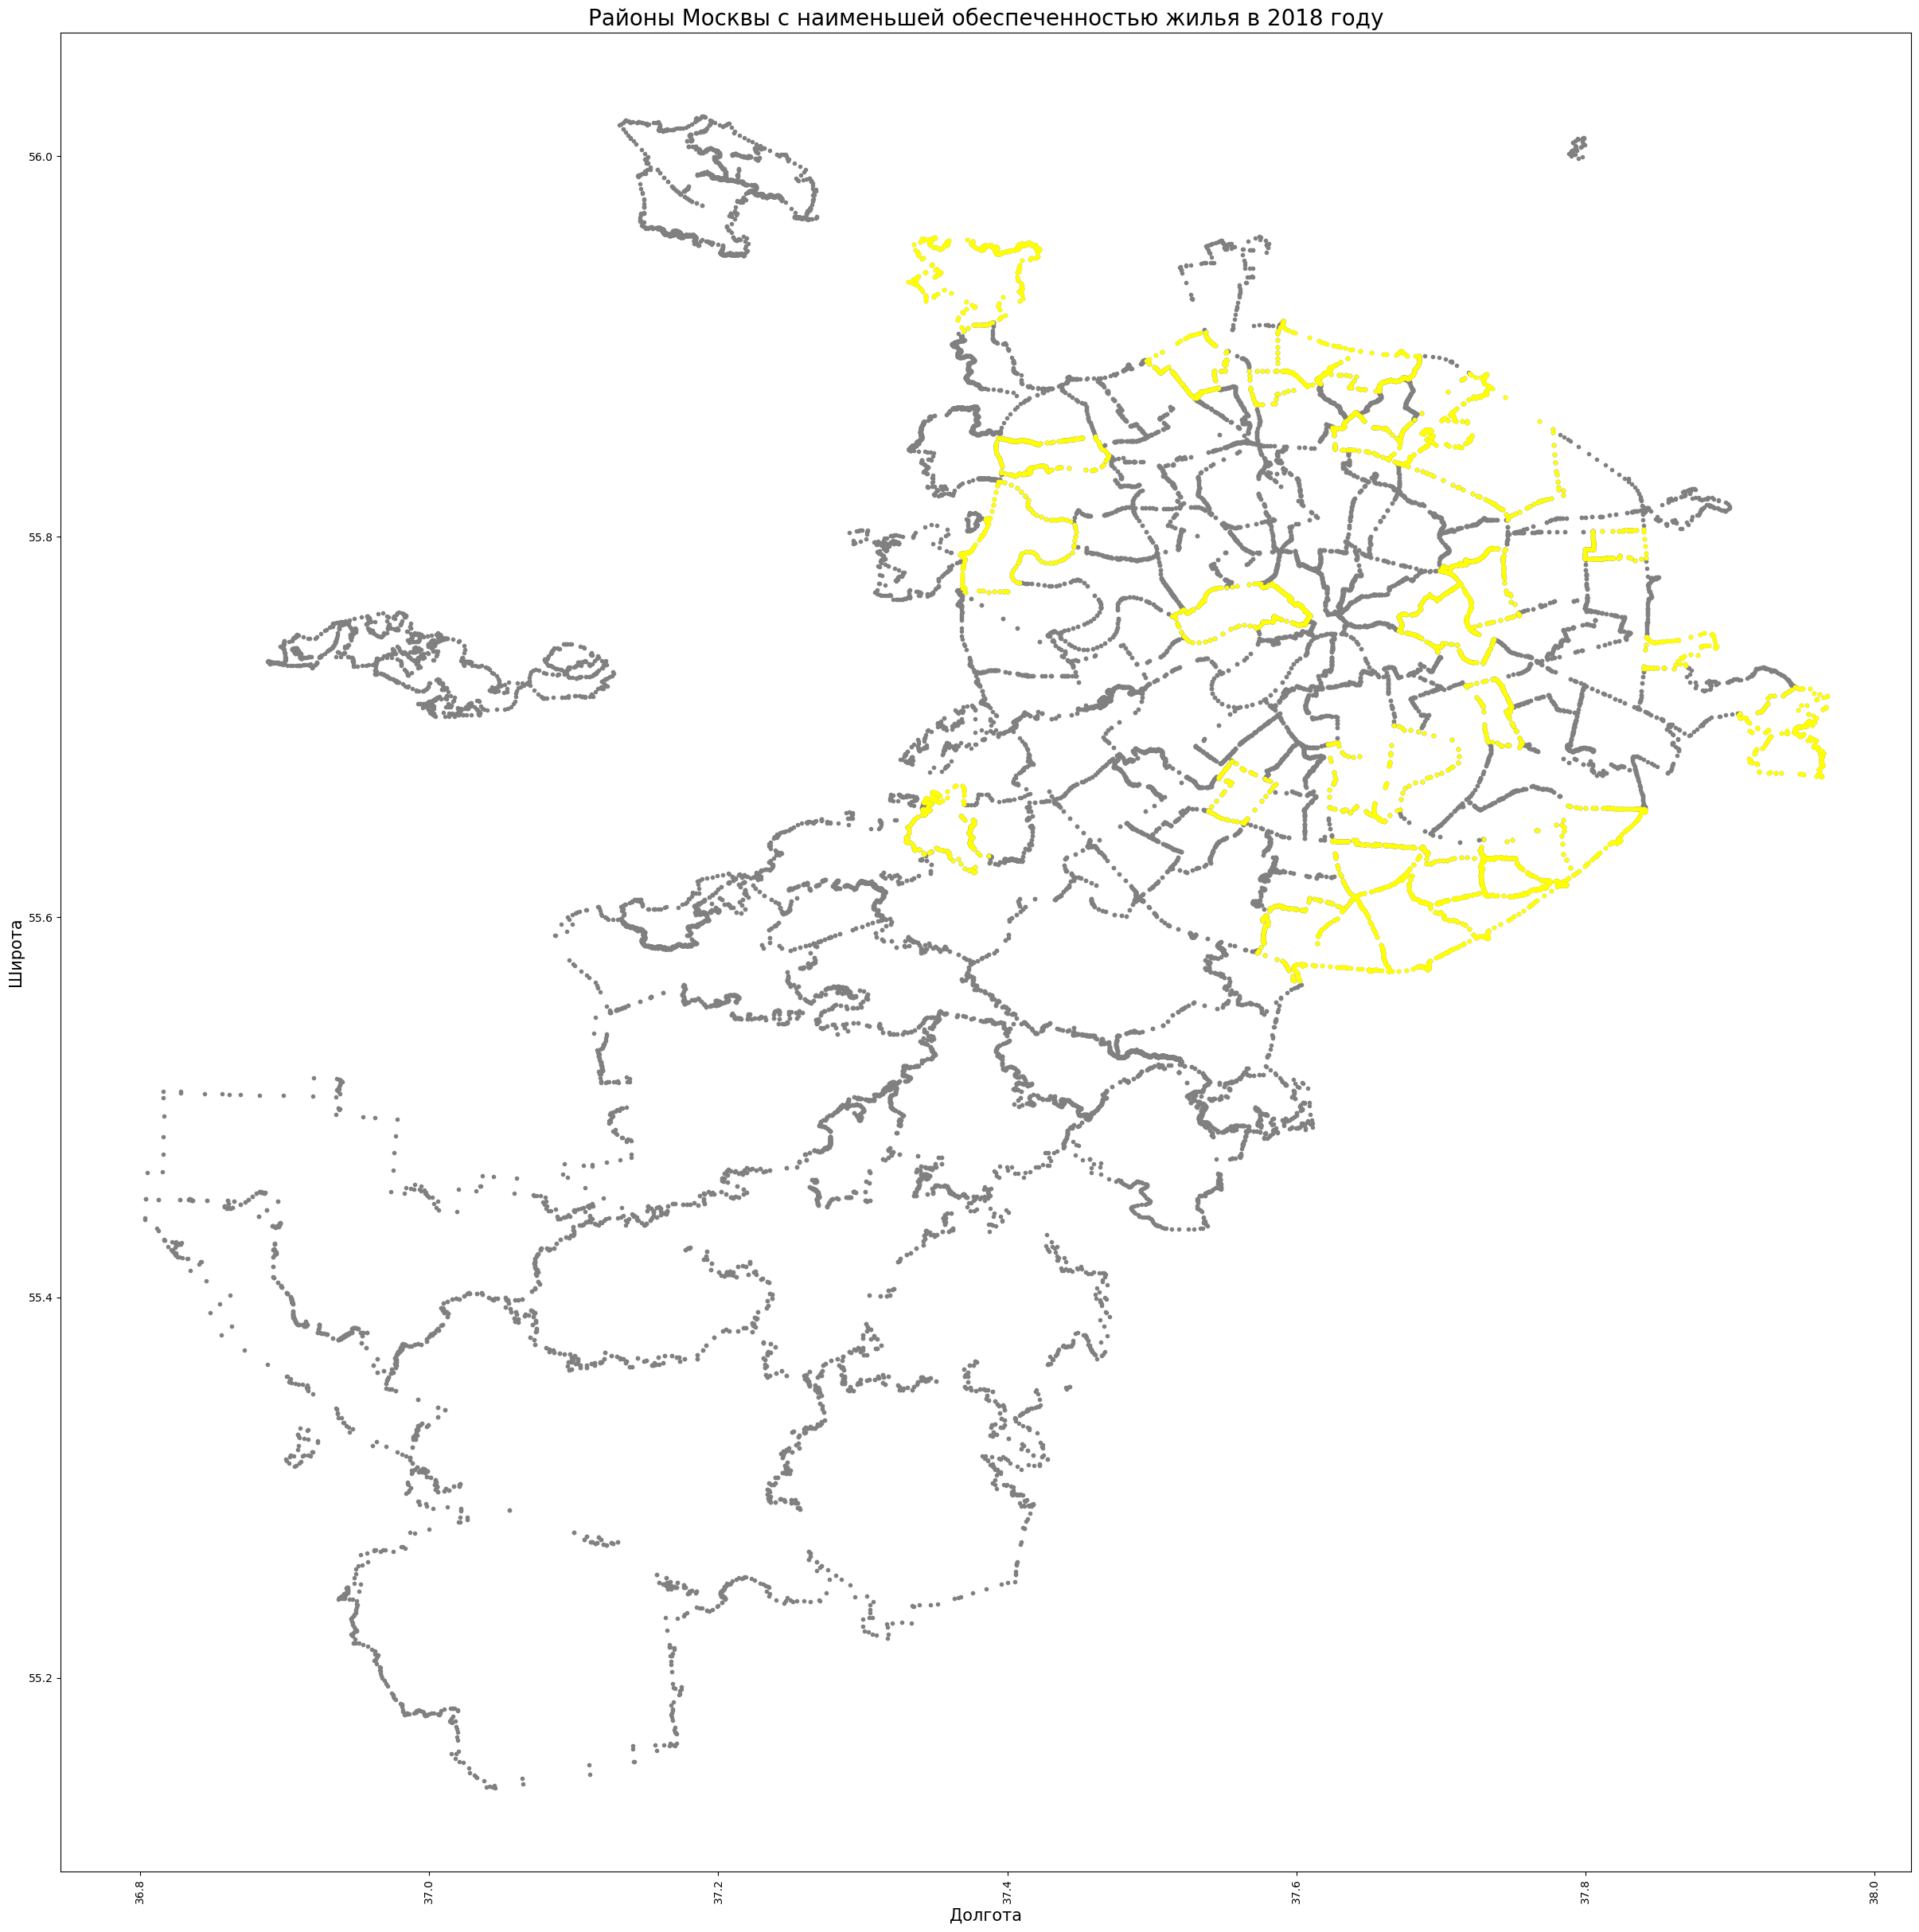

In [25]:
lat_antiobes=[]
lon_antiobes=[]
koor_antiobes=fd['Коодинаты района'].loc[mask4]
for i in koor_antiobes:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lon_antiobes.append(xd)
                            else:
                                lat_antiobes.append(xd)   
plt.figure(figsize=(30,30))
plt.plot(lot,lan,'.', color='grey')
plt.plot(lon_antiobes,lat_antiobes,'.',color='yellow')
plt.xticks(rotation='vertical')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.title('Районы Москвы с наименьшей обеспеченностью жилья в 2018 году', fontsize=20)

#### Обработка координат по плотности жилой застройки
Аналогично предыдущим 4 картам были также построены карты районов Москвы с наибольшей и наименьшей плотностью жилой застройки в 2018 году.

Text(0.5, 1.0, 'Районы Москвы с наибольшей плотностью жилой застройки в 2018 году')

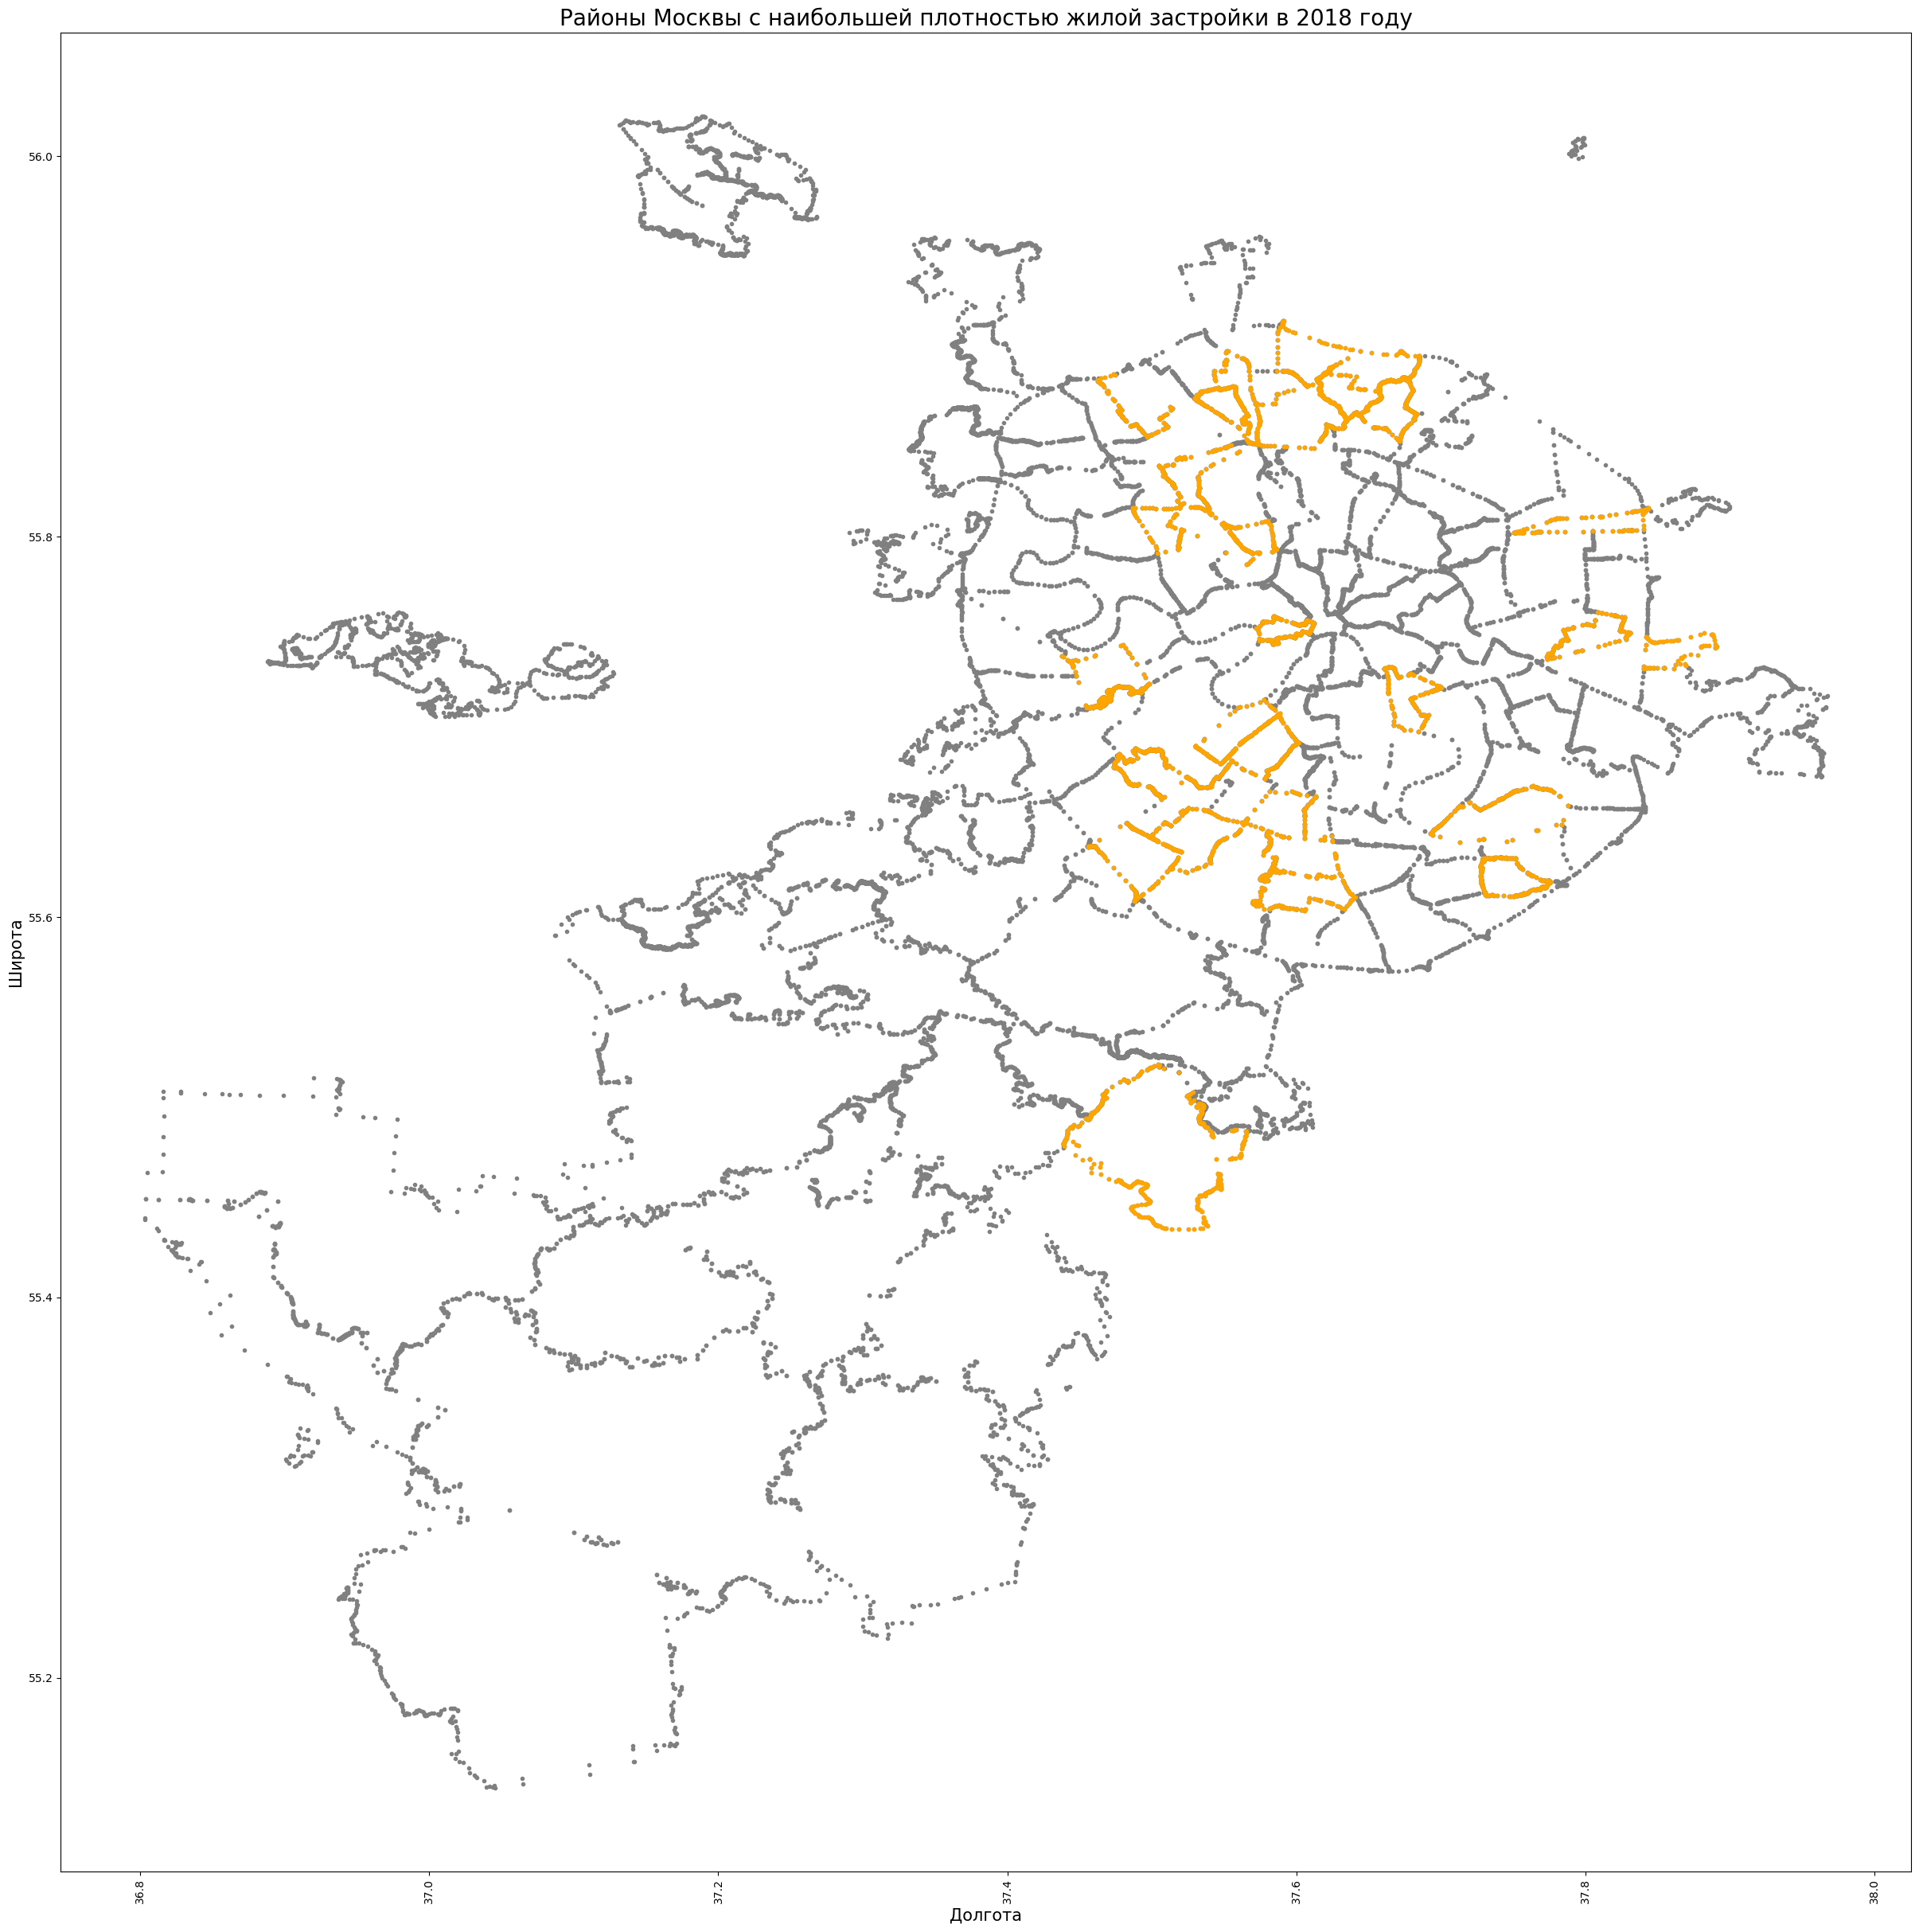

In [26]:
lat_zhil=[]
lon_zhil=[]
koor_zhil=fd['Коодинаты района'].loc[mask5]
for i in koor_zhil:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lon_zhil.append(xd)
                            else:
                                lat_zhil.append(xd)   
plt.figure(figsize=(30,30))
plt.plot(lot,lan,'.', color='grey')
plt.plot(lon_zhil,lat_zhil,'.',color='orange')
plt.xticks(rotation='vertical')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.title('Районы Москвы с наибольшей плотностью жилой застройки в 2018 году', fontsize=20)


Text(0.5, 1.0, 'Районы Москвы с наименьшей плотностью жилой застройки в 2018 году')

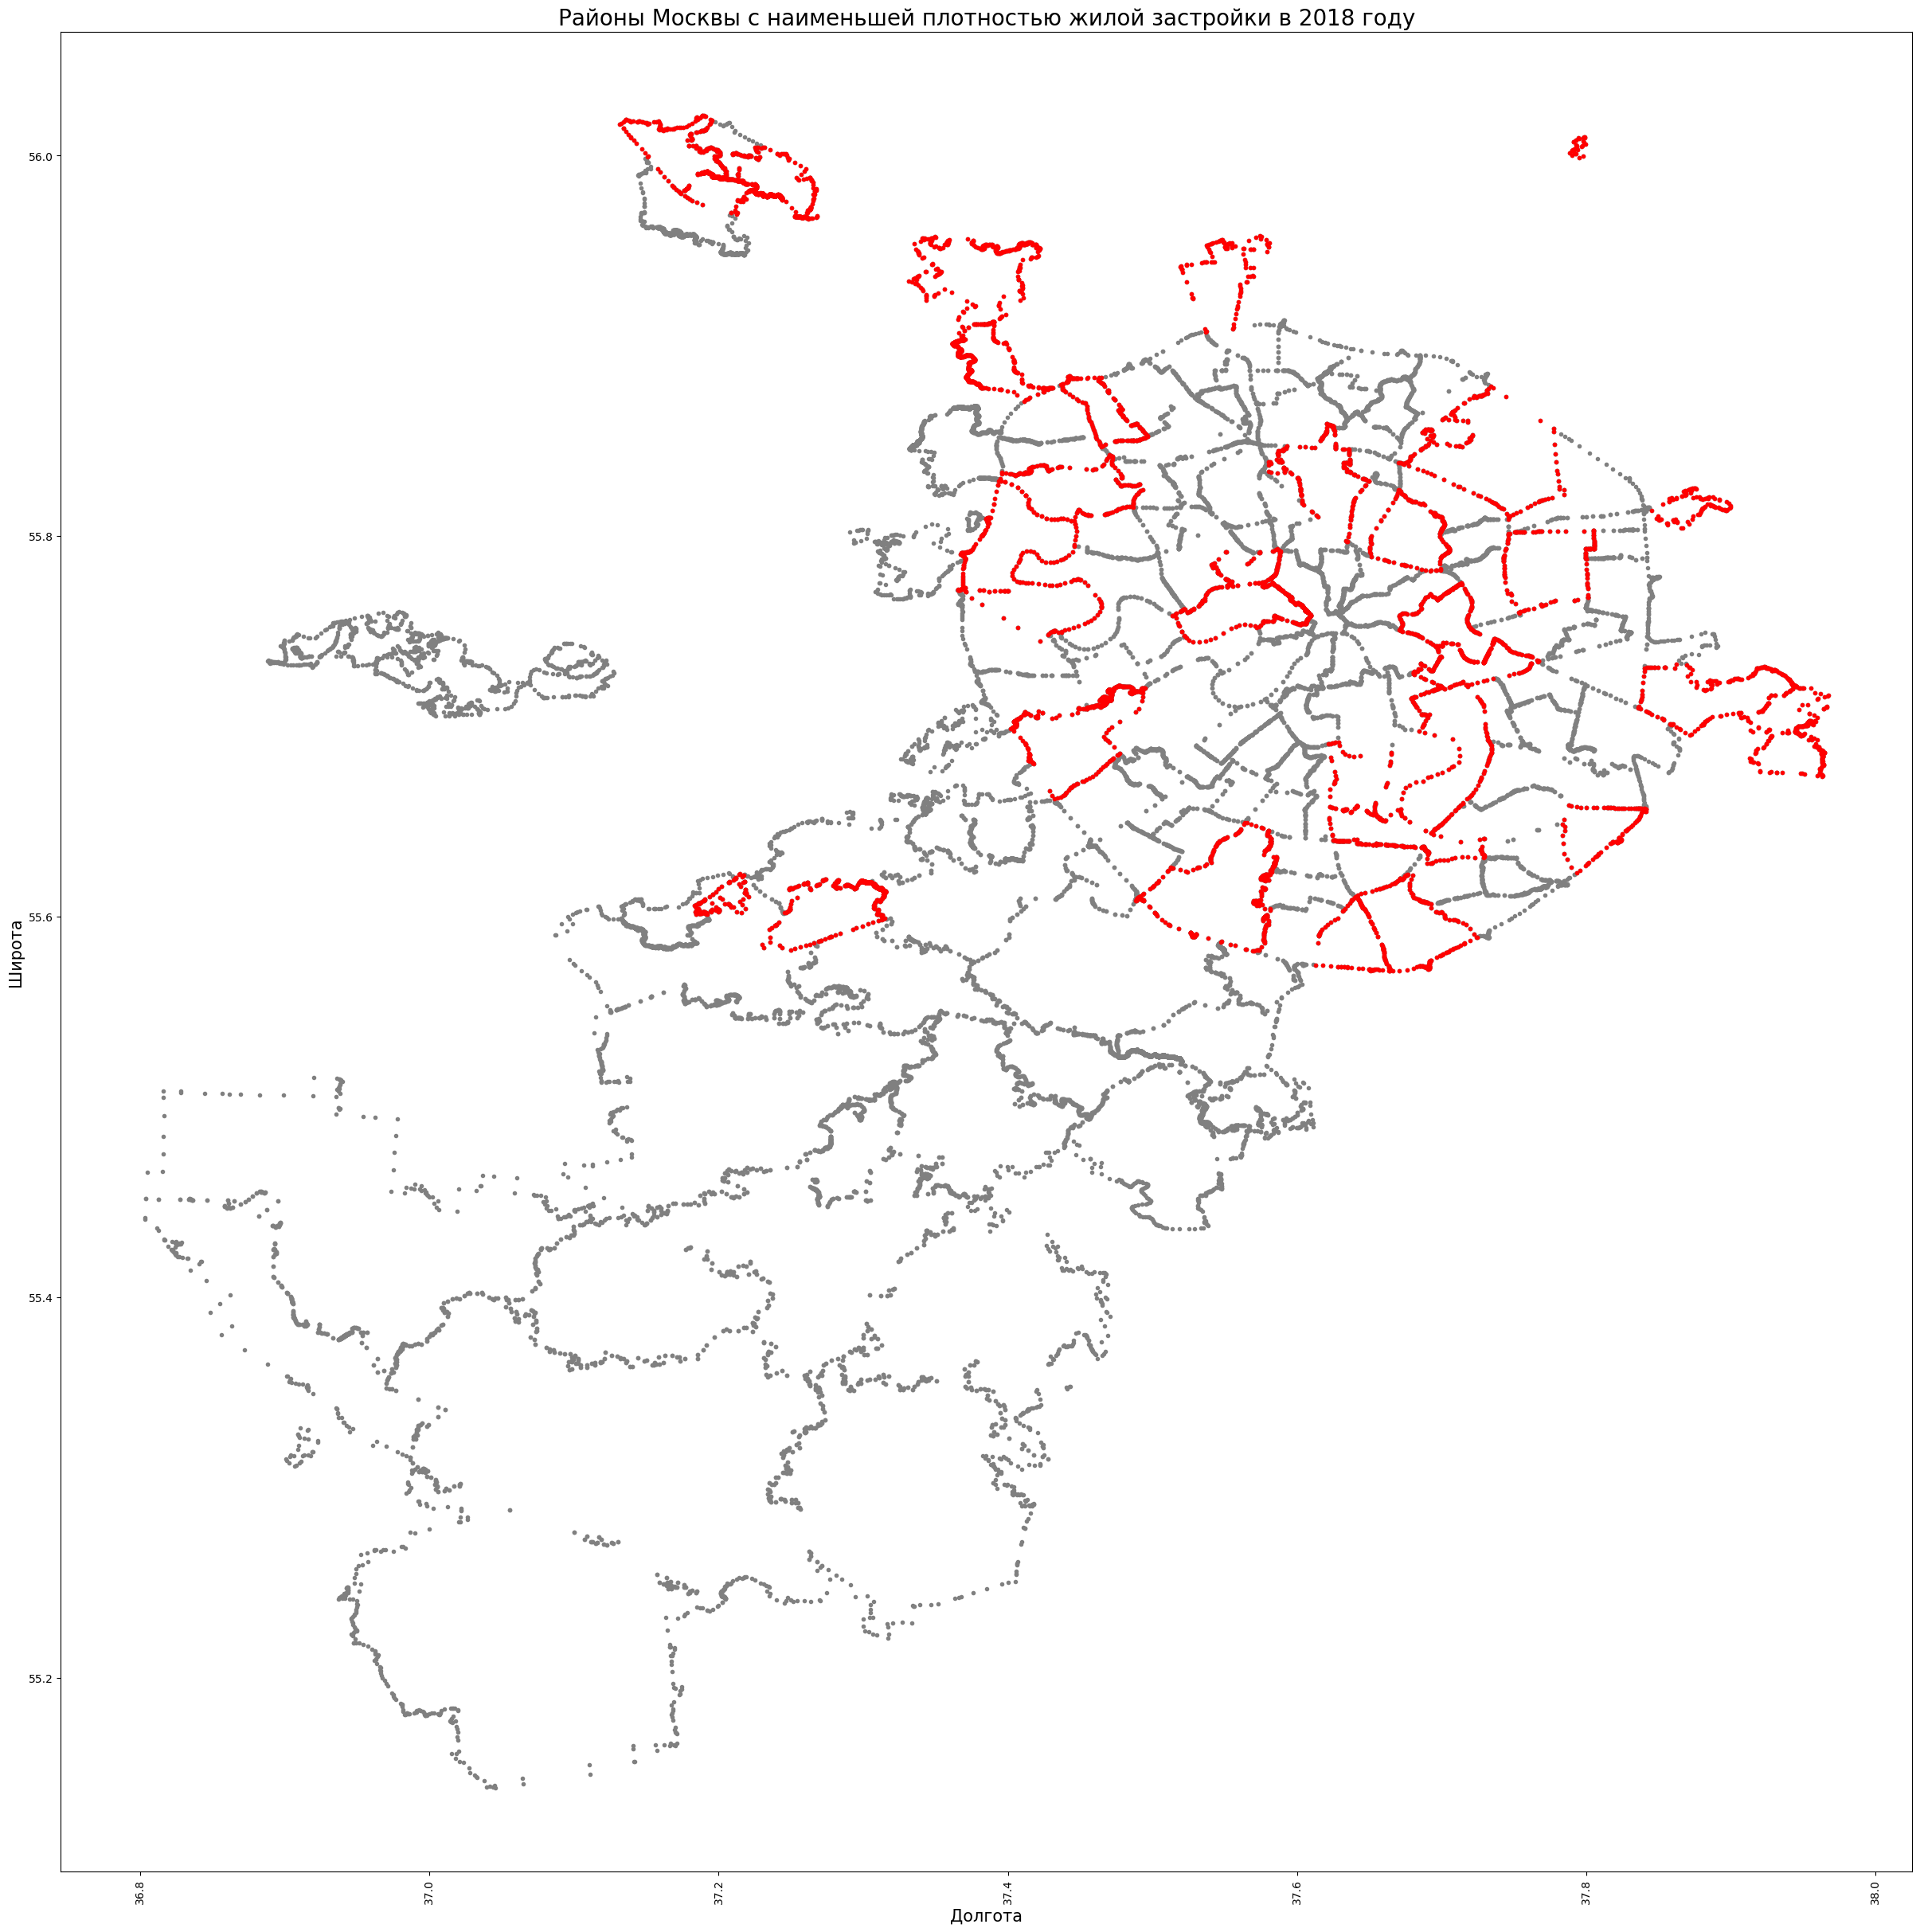

In [27]:
lat_antizhil=[]
lon_antizhil=[]
koor_antizhil=fd['Коодинаты района'].loc[mask6]
for i in koor_antizhil:
    k=i.split('], [')
    for g in k:
        lp=g.split('[')
        for ln in lp:
            lk=ln.split(']')
            for o in lk:
                for s in o:
                    if s=='':
                        o.remove(s)
                kj=o.split('\n')
                for kl in kj:
                    if kl=='':
                        kj.remove(kl)
                    else:
                        ls=kl.split(', ')
                        for gh in ls:
                            y=y+1
                            xd=float(gh)
                            if y%2==0:
                                lon_antizhil.append(xd)
                            else:
                                lat_antizhil.append(xd)   
plt.figure(figsize=(30,30))
plt.plot(lot,lan,'.', color='grey')
plt.plot(lon_antizhil,lat_antizhil,'.',color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.title('Районы Москвы с наименьшей плотностью жилой застройки в 2018 году', fontsize=20)